In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import shapely
import shapely.geometry

import sys

sys.path.append('../src')

import SRRS
from SRRS import plotting,scoring,metrics

In [2]:
sample = SRRS.HDF5('../inputs/m1s1_subset.hdf5')
sample.num_cells

152

In [3]:
sample.cell_ids[:10]

['100090299132393774825374529480599642352',
 '102762322167228082486052775619884277102',
 '103963394979214788325793179983943807873',
 '104773525917171323315032845506736864421',
 '104887114217211410540888577620028568901',
 '106736575396305345683133461207739252997',
 '106771113274834466403933341586053551462',
 '111300904473796808480218743996654298162',
 '114601597319929030309061287706907914361',
 '114794480420405132420944298037591232478']

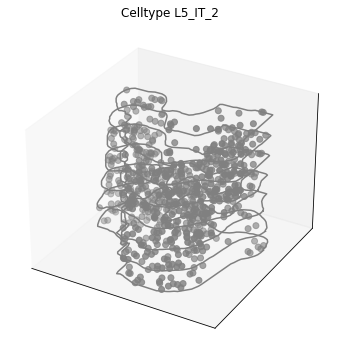

In [10]:
cell = sample.get_cells_by_id(['103963394979214788325793179983943807873'])[0]
plotting.plot_cell_3D(cell)
plt.show()
plt.close()

In [12]:
new_cell = cell.shrink_boundaries(scale_factor=0.8)
new_cell

Cell-103963394979214788325793179983943807873-L5_IT_2

In [13]:
cell.n

700

In [14]:
new_cell.n

448

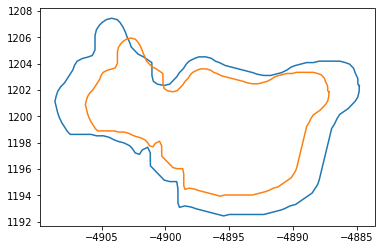

In [15]:
s = shapely.geometry.Polygon(cell.boundaries['0'])
small_s = shapely.geometry.Polygon(new_cell.boundaries['0'])

plt.plot(*s.exterior.xy)
plt.plot(*small_s.exterior.xy)
plt.show()
plt.close()

In [35]:
shrunk_cells = (c.shrink_boundaries(scale_factor=0.8) for c in sample.iter_cells())
shrunk_cells = list(SRRS.scoring._iter_vars(shrunk_cells))
shrunk_cells[0]

Cell-100090299132393774825374529480599642352-Astro_1

In [36]:
shrunk_cells[0].gene_vars

{'Cdh20': 0.1836734693877551,
 'Col25a1': 0.42857142857142855,
 'Ctss': 0.42857142857142855,
 'Cxcl14': 0.42857142857142855,
 'Frem2': 0.42857142857142855,
 'Rgs6': 0.1836734693877551}

In [38]:
s.area

199.56458129500757